In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# === Cargar datos ===
df = pd.read_csv("Estadisticas_2024_limpio/stats_Hard.csv")

# === Variables seleccionadas para clustering ===
variables = [
    # Saque
    '1st%', '2%-InP', 'Ace%', 'DF%', 'Hld%',
    # Resto
    'RPW', 'Brk%', 'BPConv%',
    # Generales
    'TPW%', 'G W%', 'S W%', 'TB W%',
    # Presión / Defensa
    'BPSvd%', 'BPvs/M', 'Bkn/M'
]

# === Guardar nombres de jugadores para referencia ===
jugadores = df['Player']

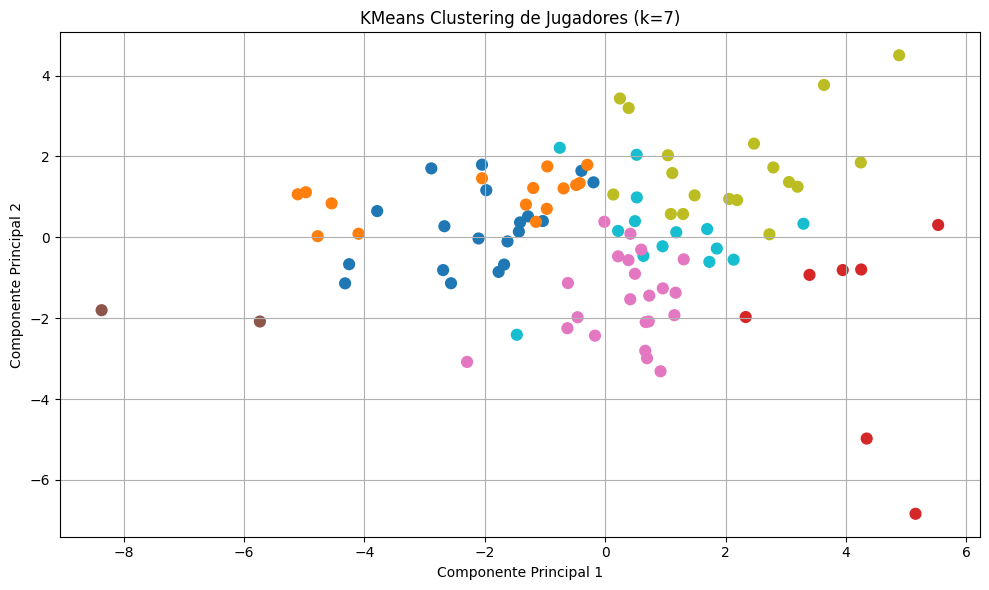

=== Promedio por clúster ===
          SPW  SPW-InP  Ace%   DF%  DF/2s  1stIn  1st%  2nd%  2%-InP  Hld%  \
Cluster                                                                      
0       -0.88    -0.72 -0.62  0.34   0.26  -0.35 -0.76 -0.65   -0.55 -0.78   
1       -0.88    -0.70 -1.23 -0.57  -0.45   0.61 -1.37 -0.04   -0.33 -0.93   
2        1.59     1.30  1.73  0.08   0.31   1.04  1.29  1.07    1.37  1.29   
3       -2.47    -2.22 -0.86  1.61   1.47  -0.52 -1.32 -3.25   -2.75 -2.59   
4        0.10    -0.29  0.54 -0.28  -0.30  -0.06  0.34 -0.34   -0.55  0.13   
5        0.84     0.74  0.24 -0.65  -0.66  -0.10  0.56  1.07    0.71  0.79   
6        0.36     0.56  0.46  0.85   0.73  -0.55  0.73 -0.07    0.38  0.41   

         BPConv%  BPChnc  Bks/S  BPSvd%  TB/S   RPW  
Cluster                                              
0           0.21   -0.12   0.51   -0.50 -0.06  0.26  
1           0.03   -0.36   0.10   -0.89 -0.64  0.20  
2          -0.61   -0.48  -1.25    0.80  1.33 -1.15 

In [57]:


# === Preprocesamiento ===
X = df[variables].copy()

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Aplicar KMeans ===
k = 7  # Número de clústeres (ajustable)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# === Visualización con PCA ===
#quiero ver que jugador es cada punto
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10', s=60)
plt.title(f"KMeans Clustering de Jugadores (k={k})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()


# === Mostrar resultados resumidos por clúster ===
resumen = df.groupby('Cluster')[variables].mean().round(2)
print("=== Promedio por clúster ===")
print(resumen)

#quiero ver  a que cluster pertene cada jugador de los 100
# === Mostrar jugadores por clúster ===
for i in range(k):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))


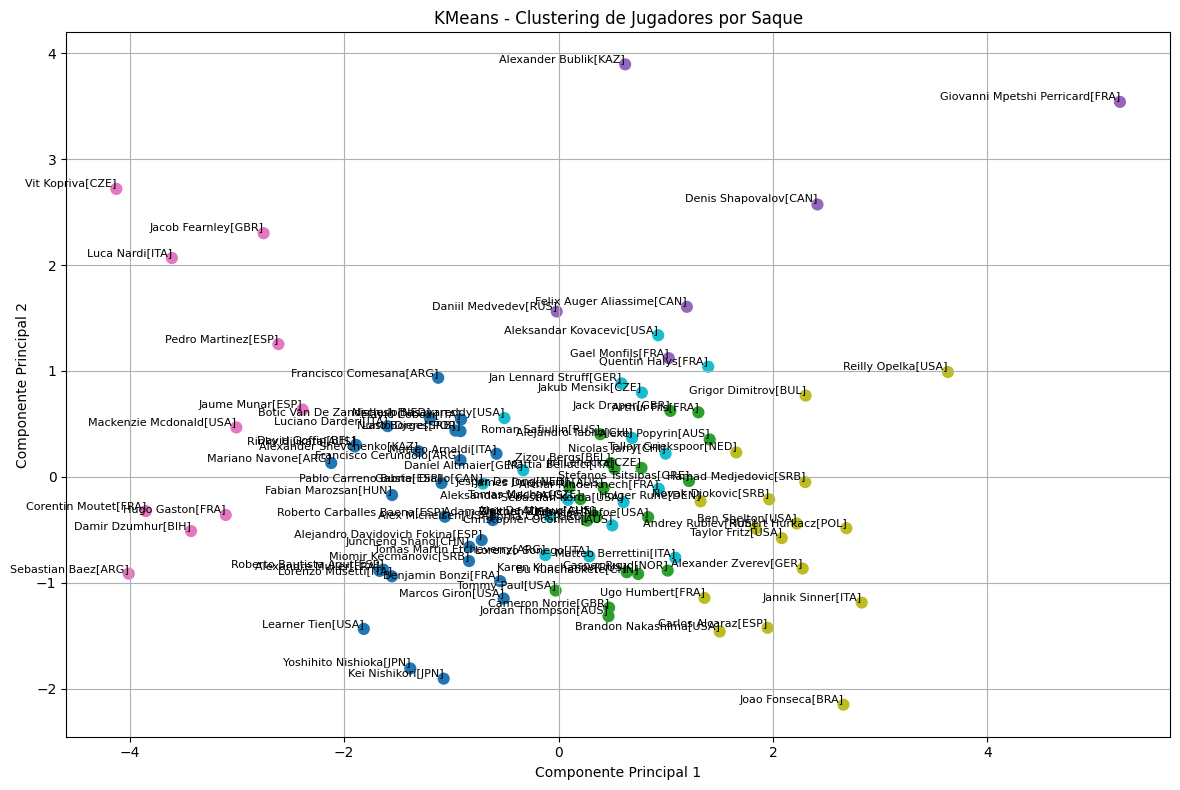


=== Jugadores en el clúster 0 ===
            Lorenzo Musetti[ITA]
        Francisco Cerundolo[ARG]
Alejandro Davidovich Fokina[ESP]
             Alex Michelsen[USA]
             Flavio Cobolli[ITA]
             Matteo Arnaldi[ITA]
           Alexandre Muller[FRA]
                Nuno Borges[POR]
               Marcos Giron[USA]
            Luciano Darderi[ITA]
          Miomir Kecmanovic[SRB]
               David Goffin[BEL]
      Roberto Bautista Agut[ESP]
             Benjamin Bonzi[FRA]
    Roberto Carballes Baena[ESP]
            Fabian Marozsan[HUN]
              Kei Nishikori[JPN]
         Francisco Comesana[ARG]
                Laslo Djere[SRB]
             Juncheng Shang[CHN]
               Learner Tien[USA]
         Yoshihito Nishioka[JPN]
             Rinky Hijikata[AUS]
    Botic Van De Zandschulp[NED]
       Alexander Shevchenko[KAZ]
        Pablo Carreno Busta[ESP]
             Mariano Navone[ARG]

=== Jugadores en el clúster 1 ===
       Jack Draper[GBR]
       Casper R

In [60]:


# === Variables de saque ===
variables_saque = ['1st%', '2%-InP', 'Ace%', 'DF%', 'Hld%']
X = df[variables_saque]

# === Normalizar ===
X_scaled = StandardScaler().fit_transform(X)

# === KMeans ===
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster_Saque'] = kmeans.fit_predict(X_scaled)

# === Visualización PCA ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Saque'], cmap='tab10', s=60)
plt.title("KMeans - Clustering de Jugadores por Saque")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# === Añadir etiquetas con nombres de jugadores ===
for i, name in enumerate(df['Player']):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# === Mostrar resultado por clúster ===
for i in range(k):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster_Saque'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))

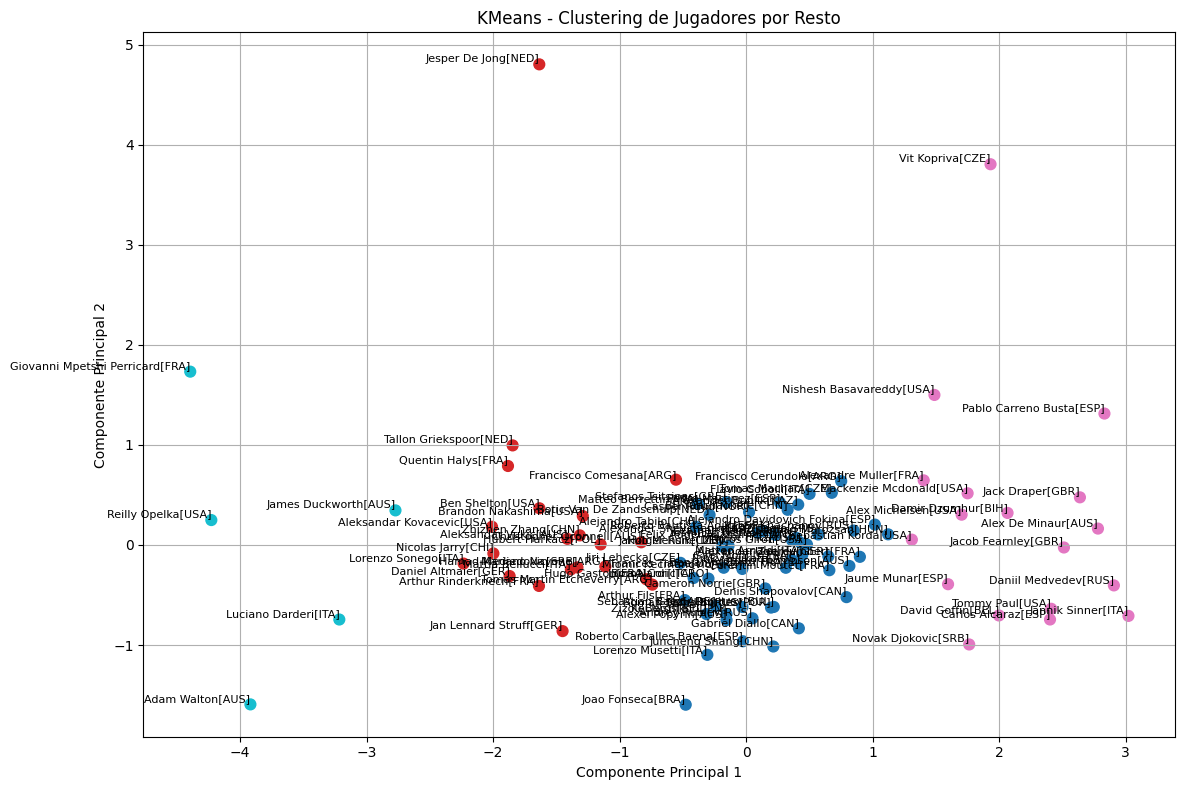


=== Jugadores en el clúster 0 ===
           Alexander Zverev[GER]
               Taylor Fritz[USA]
                Casper Ruud[NOR]
            Lorenzo Musetti[ITA]
                Holger Rune[DEN]
                Arthur Fils[FRA]
            Grigor Dimitrov[BUL]
             Frances Tiafoe[USA]
              Andrey Rublev[RUS]
        Francisco Cerundolo[ARG]
         Stefanos Tsitsipas[GRE]
               Tomas Machac[CZE]
               Jakub Mensik[CZE]
                Ugo Humbert[FRA]
            Karen Khachanov[RUS]
             Alexei Popyrin[AUS]
Alejandro Davidovich Fokina[ESP]
      Felix Auger Aliassime[CAN]
           Denis Shapovalov[CAN]
          Matteo Berrettini[ITA]
             Sebastian Baez[ARG]
             Flavio Cobolli[ITA]
             Matteo Arnaldi[ITA]
               Jiri Lehecka[CZE]
                Nuno Borges[POR]
            Jordan Thompson[AUS]
           Alejandro Tabilo[CHI]
               Gael Monfils[FRA]
               Marcos Giron[USA]
        

In [63]:
# === Variables de resto ===
variables_resto = ['RPW', 'Brk%', 'BPConv%']
X = df[variables_resto]

# === Normalizar y KMeans ===
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Resto'] = kmeans.fit_predict(X_scaled)

# === PCA + plot ===
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Resto'], cmap='tab10', s=60)
plt.title("KMeans - Clustering de Jugadores por Resto")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# === Añadir etiquetas con nombres de jugadores ===
for i, name in enumerate(df['Player']):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# === Mostrar resultado por clúster ===
for i in range(4):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster_Resto'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))

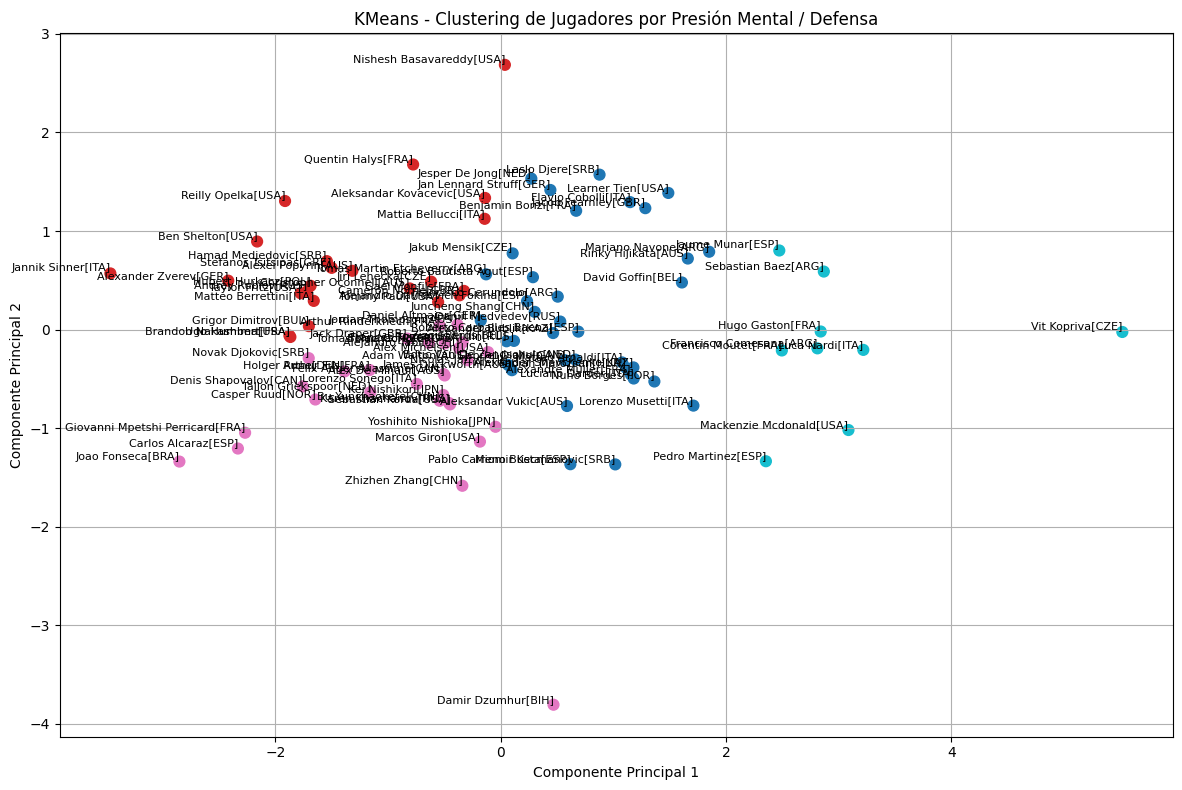


=== Jugadores en el clúster 0 ===
            Lorenzo Musetti[ITA]
            Daniil Medvedev[RUS]
        Francisco Cerundolo[ARG]
               Jakub Mensik[CZE]
Alejandro Davidovich Fokina[ESP]
             Flavio Cobolli[ITA]
             Matteo Arnaldi[ITA]
           Alexandre Muller[FRA]
                Nuno Borges[POR]
            Luciano Darderi[ITA]
          Miomir Kecmanovic[SRB]
               David Goffin[BEL]
                Zizou Bergs[BEL]
    Tomas Martin Etcheverry[ARG]
              Nicolas Jarry[CHI]
             Gabriel Diallo[CAN]
      Roberto Bautista Agut[ESP]
             Jacob Fearnley[GBR]
             Benjamin Bonzi[FRA]
    Roberto Carballes Baena[ESP]
            Fabian Marozsan[HUN]
                Laslo Djere[SRB]
             Juncheng Shang[CHN]
               Learner Tien[USA]
            Daniel Altmaier[GER]
           Alexander Bublik[KAZ]
            Roman Safiullin[RUS]
           Aleksandar Vukic[AUS]
             Rinky Hijikata[AUS]
    Boti

In [66]:
# === Variables de presión mental / defensa ===
variables_presion = ['BPSvd%', 'BPvs/M', 'Bkn/M']
X = df[variables_presion]

# === Normalizar y KMeans ===
X_scaled = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Presion'] = kmeans.fit_predict(X_scaled)

# === PCA + plot ===
X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Presion'], cmap='tab10', s=60)
plt.title("KMeans - Clustering de Jugadores por Presión Mental / Defensa")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)

# === Añadir etiquetas con nombres de jugadores ===
for i, name in enumerate(df['Player']):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, ha='right', va='bottom')

plt.tight_layout()
plt.show()

# === Mostrar resultado por clúster ===
for i in range(4):
    print(f"\n=== Jugadores en el clúster {i} ===")
    jugadores_en_cluster = df[df['Cluster_Presion'] == i]['Player']
    print(jugadores_en_cluster.to_string(index=False))

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === Cargar dataset original ===
df = pd.read_csv("Estadisticas_2024/stats_Hard.csv")

# === Eliminar columnas duplicadas y columnas con sufijos como .1, .2
df = df.loc[:, ~df.columns.duplicated()]
df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

# === Copiar para limpiar
df_clean = df.copy()

# === Eliminar columnas indicadas por el usuario
columnas_a_eliminar = [
    'Player_dup', 'M_dup', 'M W-L', 'Aces', 'DFs', 'Pts/SG', 'PtsL/SG',
    'RPW-InP', 'Pts/RG', 'PtsW/RG', 'MdOppRk', 'MnOppRk',
    'BPConv', 'BPSaved', 'BPvs', 'DR', 'Points', 'TB W-L', 'TBs',
    'Sets', 'Set W-L', 'Gms', 'Game W-L', 'Time/Mt', 'Min/Set', 'Sec/Pt'
]
df_clean = df_clean.drop(columns=[col for col in columnas_a_eliminar if col in df_clean.columns], errors='ignore')

# === Eliminar columnas tipo "W-L" con patrón 'n-n'
cols_w_l = [col for col in df_clean.columns if df_clean[col].astype(str).str.contains(r'^\d+-\d+$', regex=True).any()]
df_clean = df_clean.drop(columns=cols_w_l)

# === Limpiar columnas con '%' → convertir a float decimal
cols_pct = [col for col in df_clean.columns if df_clean[col].astype(str).str.contains('%').any()]
for col in cols_pct:
    df_clean[col] = df_clean[col].astype(str).str.replace('%', '', regex=False).str.strip()
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce') / 100.0

# === Convertir todas las columnas restantes (menos 'Player') a float
columnas_numericas = [col for col in df_clean.columns if col != 'Player']
for col in columnas_numericas:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# === Eliminar columnas con >30% NaNs
df_clean = df_clean.dropna(thresh=int(0.7 * len(df_clean)), axis=1)

# === Eliminar filas con NaNs restantes
df_clean = df_clean.dropna().reset_index(drop=True)

# === Escalar columnas numéricas
cols_final = [col for col in df_clean.columns if col != 'Player']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean[cols_final]), columns=cols_final)

# === Añadir columna 'Player' al inicio
df_scaled.insert(0, 'Player', df_clean['Player'].values)

# === Guardar dataset limpio
df_scaled.to_csv("stats_Hard2_limpio_escalado.csv", index=False)
print("Dataset limpio y escalado guardado como 'stats_Hard_limpio_escalado.csv'")


Dataset limpio y escalado guardado como 'stats_Hard_limpio_escalado.csv'


Variables a incluir para Score_Serve:
M W%,SPW,SPW-InP,Ace%,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,RPW,vAce%,vDF%,v1st%,v2nd%,Brk%,BPConv%,BPChnc,BP/G,BP/S,BP/M,Bks/S,Bks/M,BPSvd%,BPvs/G,BPvs/S,BPvs/M,Bkn/S,Bkn/M,TPW%,TB W%,TB/S,S W%,G W%

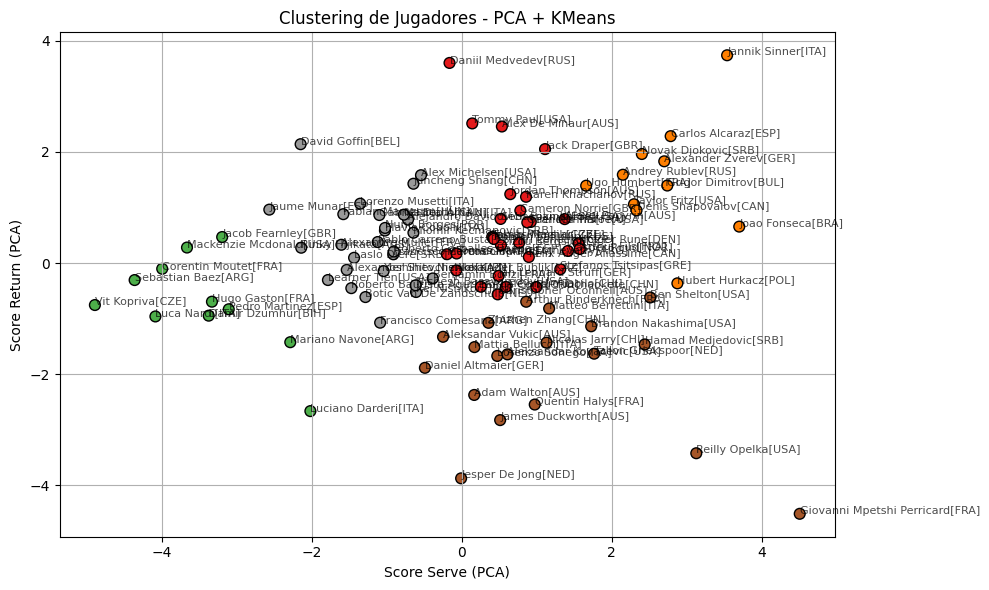


Resumen promedio por cluster:
         Score_Serve  Score_Return
Cluster                           
0               0.67          0.62
1              -3.48         -0.72
2               2.65          1.50
3               1.14         -1.92
4              -1.19          0.37

Pesos del PCA para Score_Serve:
Ace%: 0.395
Hld%: 0.498
1st%: 0.495
2nd%: 0.372
SPW-InP: 0.461

Pesos del PCA para Score_Return:
RPW: 0.447
Brk%: 0.400
BPConv%: 0.128
BPChnc: 0.524
BP/M: 0.591

Jugadores por cluster:

Cluster 2:
   Jannik Sinner[ITA]
Alexander Zverev[GER]
  Carlos Alcaraz[ESP]
    Taylor Fritz[USA]
  Novak Djokovic[SRB]
 Grigor Dimitrov[BUL]
   Andrey Rublev[RUS]
     Ugo Humbert[FRA]
Denis Shapovalov[CAN]
  Hubert Hurkacz[POL]
    Joao Fonseca[BRA]

Cluster 0:
            Jack Draper[GBR]
            Casper Ruud[NOR]
         Alex De Minaur[AUS]
            Holger Rune[DEN]
        Daniil Medvedev[RUS]
             Tommy Paul[USA]
            Arthur Fils[FRA]
         Frances Tiafoe[USA]
     Ste

In [54]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
serve_vars = ['Ace%', 'Hld%', '1st%', '2nd%', 'SPW-InP',] #bp svd
return_vars = ['RPW', 'Brk%', 'BPConv%', 'BPChnc', 'BP/M']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['Score_Serve'] = pca_serve.fit_transform(df[serve_vars])

pca_return = PCA(n_components=1)
df['Score_Return'] = pca_return.fit_transform(df[return_vars])

# 4. Clustering con KMeans
features = df[['Score_Serve', 'Score_Return']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['Score_Serve'], df['Score_Return'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['Score_Serve'][i], df['Score_Return'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score Serve (PCA)")
plt.ylabel("Score Return (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['Score_Serve', 'Score_Return']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Score_Serve:")
for var, weight in zip(serve_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Score_Return:")
for var, weight in zip(return_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Vamos a diferenciar los buenos sacadores de los jugadores que son solidos con su saque

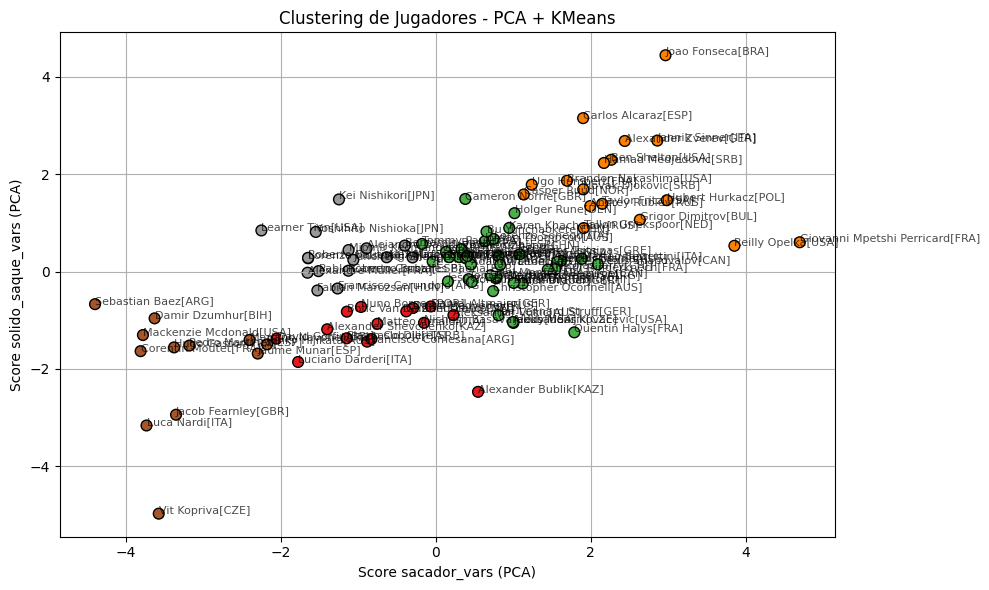


Resumen promedio por cluster:
         sacador_vars  solido_saque_vars
Cluster                                 
0               -0.74              -1.20
1                0.81               0.12
2                2.40               1.87
3               -3.31              -1.94
4               -1.24               0.33

Pesos del PCA para Sacador:
Ace%: 0.456
1stIn: 0.038
1st%: 0.526
SPW: 0.517
Hld%: 0.496

Pesos del PCA para Servicio solido:
DF/2s: -0.284
1stIn: 0.333
2nd%: 0.677
SPW-InP: 0.592

Jugadores por cluster:

Cluster 2:
             Jannik Sinner[ITA]
          Alexander Zverev[GER]
            Carlos Alcaraz[ESP]
              Taylor Fritz[USA]
            Novak Djokovic[SRB]
               Casper Ruud[NOR]
               Ben Shelton[USA]
           Grigor Dimitrov[BUL]
             Andrey Rublev[RUS]
               Ugo Humbert[FRA]
         Brandon Nakashima[USA]
            Hubert Hurkacz[POL]
         Tallon Griekspoor[NED]
Giovanni Mpetshi Perricard[FRA]
              Joao

In [11]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
sacador_vars = ['Ace%', '1stIn', '1st%', 'SPW', 'Hld%'] #bp svd
solido_saque_vars = ['DF/2s','1stIn','2nd%', 'SPW-InP']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['sacador_vars'] = pca_serve.fit_transform(df[sacador_vars])

pca_return = PCA(n_components=1)
df['solido_saque_vars'] = pca_return.fit_transform(df[solido_saque_vars])

# 4. Clustering con KMeans
features = df[['sacador_vars', 'solido_saque_vars']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['sacador_vars'], df['solido_saque_vars'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['sacador_vars'][i], df['solido_saque_vars'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score sacador_vars (PCA)")
plt.ylabel("Score solido_saque_vars (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['sacador_vars', 'solido_saque_vars']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Sacador:")
for var, weight in zip(sacador_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Servicio solido:")
for var, weight in zip(solido_saque_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



este mejor que el de abajo creo

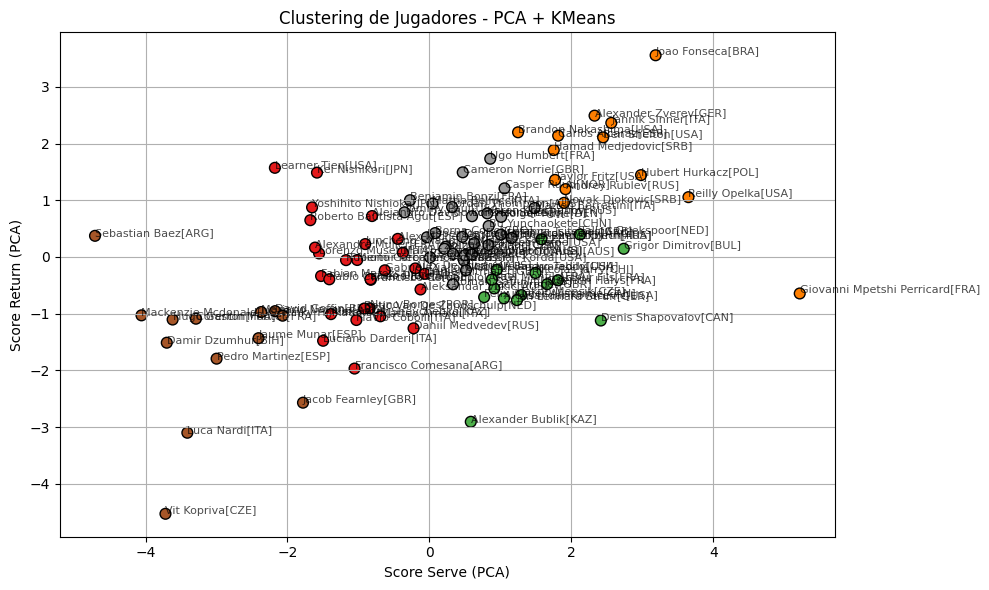


Resumen promedio por cluster:
         sacador_vars  solido_saque_vars
Cluster                                 
0               -1.01              -0.23
1                1.43              -0.56
2                2.52               1.70
3               -3.10              -1.60
4                0.51               0.49

Pesos del PCA para Sacador:
Ace%: 0.459
Hld%: 0.498
1st%: 0.536
SPW-InP: 0.440
TB/S: 0.246

Pesos del PCA para Servicio solido:
DF/2s: -0.412
1stIn: 0.423
2nd%: 0.699
BPSvd%: 0.404

Jugadores por cluster:

Cluster 2:
             Jannik Sinner[ITA]
          Alexander Zverev[GER]
            Carlos Alcaraz[ESP]
              Taylor Fritz[USA]
            Novak Djokovic[SRB]
               Ben Shelton[USA]
             Andrey Rublev[RUS]
         Brandon Nakashima[USA]
            Hubert Hurkacz[POL]
Giovanni Mpetshi Perricard[FRA]
              Joao Fonseca[BRA]
          Hamad Medjedovic[SRB]
             Reilly Opelka[USA]

Cluster 1:
          Jack Draper[GBR]
         

In [ ]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
sacador_vars = ['Ace%', '1stIn', '1st%', 'SPW', 'Hld%'] #bp svd
solido_saque_vars = ['DF/2s','1stIn','2nd%', 'SPW-InP']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['sacador_vars'] = pca_serve.fit_transform(df[sacador_vars])

pca_return = PCA(n_components=1)
df['solido_saque_vars'] = pca_return.fit_transform(df[solido_saque_vars])

# 4. Clustering con KMeans
features = df[['sacador_vars', 'solido_saque_vars']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['sacador_vars'], df['solido_saque_vars'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['sacador_vars'][i], df['solido_saque_vars'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score sacador_vars (PCA)")
plt.ylabel("Score solido_saque_vars (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['sacador_vars', 'solido_saque_vars']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Sacador:")
for var, weight in zip(sacador_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Servicio solido:")
for var, weight in zip(solido_saque_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Perricard ya no es tan bueno, fonseca sera porque ha jugado pocos partidos

Vamos a separar los buenos restadores de los malos restadores

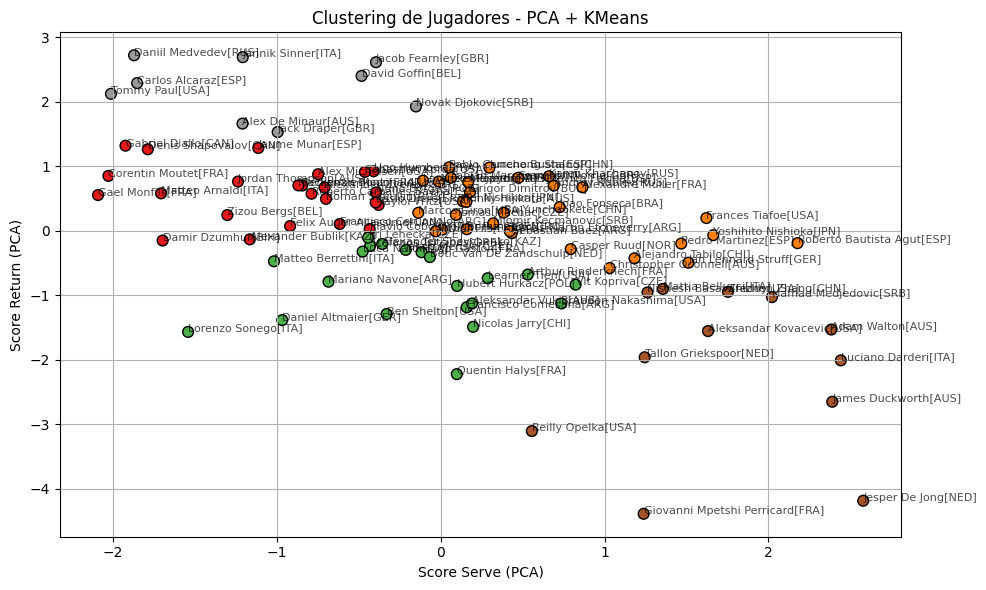


Resumen promedio por cluster:
         Score_Serve  Score_Return
Cluster                           
0              -1.03          0.59
1              -0.17         -0.84
2               0.56          0.29
3               1.74         -2.10
4              -1.13          2.22

Pesos del PCA para Score_Serve:
vAce%: 0.884
v1st%: -0.468

Pesos del PCA para Score_Return:
Brk%: 0.469
BP/S: 0.711
RPW: 0.524

Jugadores por cluster:

Cluster 4:
  Jannik Sinner[ITA]
 Carlos Alcaraz[ESP]
    Jack Draper[GBR]
 Novak Djokovic[SRB]
 Alex De Minaur[AUS]
Daniil Medvedev[RUS]
     Tommy Paul[USA]
   David Goffin[BEL]
 Jacob Fearnley[GBR]

Cluster 0:
       Alexander Zverev[GER]
           Taylor Fritz[USA]
    Francisco Cerundolo[ARG]
            Ugo Humbert[FRA]
        Sebastian Korda[USA]
  Felix Auger Aliassime[CAN]
       Denis Shapovalov[CAN]
         Alex Michelsen[USA]
         Flavio Cobolli[ITA]
         Matteo Arnaldi[ITA]
            Nuno Borges[POR]
        Jordan Thompson[AUS]
          

In [69]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
saque_rival_vars = ['vAce%', 'v1st%'] #bp svd
resto_vars = ['Brk%', 'BP/S', 'RPW']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['Score_Serve'] = pca_serve.fit_transform(df[saque_rival_vars])

pca_return = PCA(n_components=1)
df['Score_Return'] = pca_return.fit_transform(df[resto_vars])

# 4. Clustering con KMeans
features = df[['Score_Serve', 'Score_Return']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['Score_Serve'], df['Score_Return'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['Score_Serve'][i], df['Score_Return'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("Score Serve (PCA)")
plt.ylabel("Score Return (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['Score_Serve', 'Score_Return']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para Score_Serve:")
for var, weight in zip(saque_rival_vars, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para Score_Return:")
for var, weight in zip(resto_vars, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Vamos a separar los jugadores regulares(mantienen mucho su primer servicio, provocan muchas bolas de break, buen % de primeros) de los inestables(pocos puntos al resto, pocos saques primeros in ,dobles faltas)

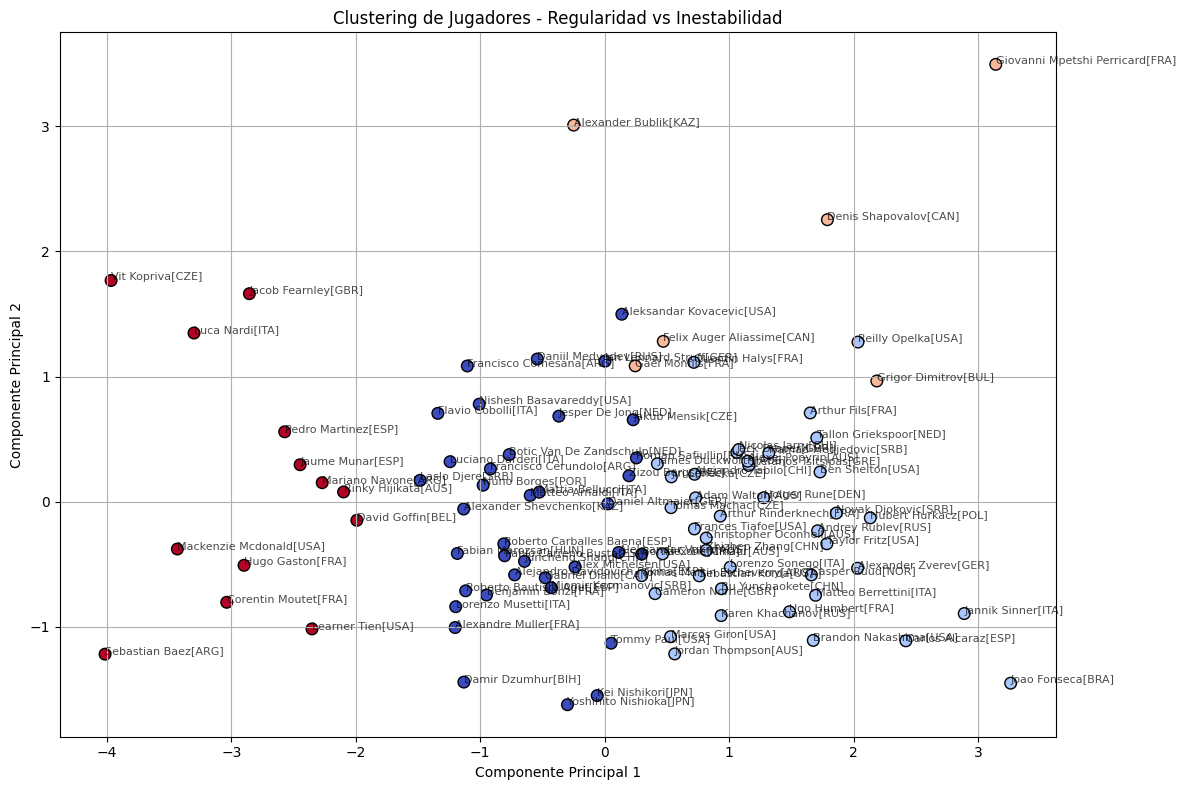


Resumen promedio por cluster:
                     1st%   DF%  Hld%  BPvs/M   RPW
Cluster_Regularidad                                
0                   -0.39 -0.09 -0.34    0.35  0.02
1                    0.69 -0.45  0.71   -0.67 -0.17
2                    1.19  1.95  0.63   -0.74 -0.26
3                   -1.66  0.46 -1.73    1.52  0.18

Cluster 1:
          Jannik Sinner[ITA]
       Alexander Zverev[GER]
         Carlos Alcaraz[ESP]
           Taylor Fritz[USA]
            Jack Draper[GBR]
         Novak Djokovic[SRB]
            Casper Ruud[NOR]
         Alex De Minaur[AUS]
            Holger Rune[DEN]
            Ben Shelton[USA]
            Arthur Fils[FRA]
         Frances Tiafoe[USA]
          Andrey Rublev[RUS]
     Stefanos Tsitsipas[GRE]
           Tomas Machac[CZE]
            Ugo Humbert[FRA]
        Sebastian Korda[USA]
        Karen Khachanov[RUS]
         Alexei Popyrin[AUS]
      Brandon Nakashima[USA]
      Matteo Berrettini[ITA]
         Hubert Hurkacz[POL]
      T

In [71]:
# === 2. Variables para regularidad ===
vars_reg = ['1st%', 'DF%', 'Hld%', 'BPvs/M', 'RPW']
X = df[vars_reg]

# === 3. PCA sin reescalar (ya están normalizadas) ===
X_pca = PCA(n_components=2).fit_transform(X)

# === 4. KMeans clustering ===
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_Regularidad'] = kmeans.fit_predict(X)

# === 5. Visualización ===
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster_Regularidad'], cmap='coolwarm', s=70, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - Regularidad vs Inestabilidad")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 6. Promedio por grupo para interpretación ===
summary = df.groupby('Cluster_Regularidad')[vars_reg].mean().round(2)
print("\nResumen promedio por cluster:")
print(summary)

# === 7. Jugadores por grupo ===
for cluster in df['Cluster_Regularidad'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster_Regularidad'] == cluster]['Player'].to_string(index=False))

este no me vale

Vamos a enfrentar un buen restador contra uno que aprovecha mucho sus oportunidades

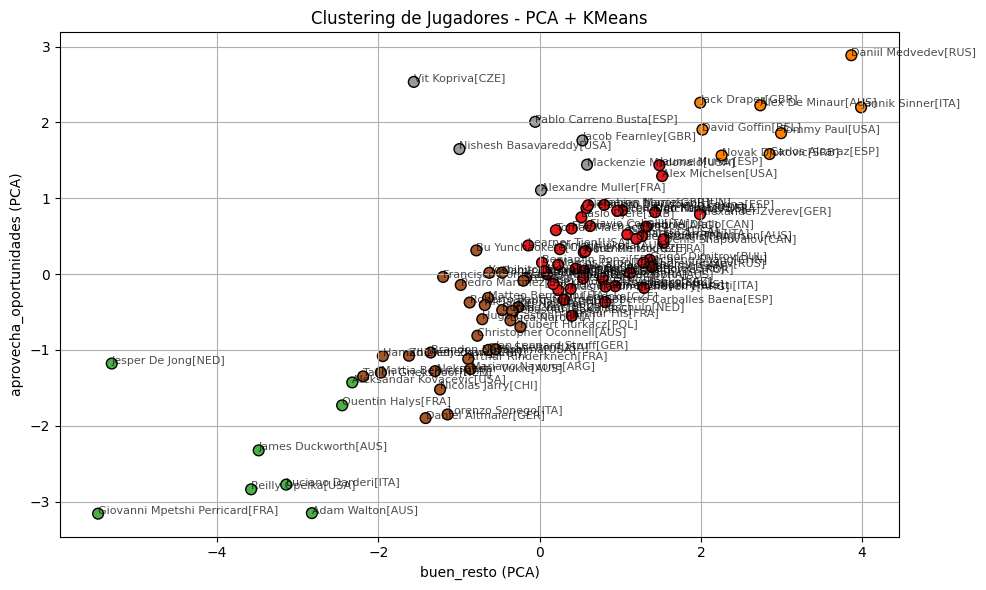


Resumen promedio por cluster:
         buen_resto  aprovecha_oportunidades
Cluster                                     
0              0.79                     0.32
1             -3.57                    -2.32
2              2.84                     2.06
3             -0.88                    -0.72
4             -0.25                     1.75

Pesos del PCA para buen_resto:
vAce%: -0.341
v1st%: 0.341
RPW: 0.397
v2nd%: 0.403
BPChnc: 0.431
BP/M: 0.512

Pesos del PCA para aprovecha_oportunidades:
Brk%: 0.519
BPConv%: 0.395
Bks/M: 0.758

Jugadores por cluster:

Cluster 2:
  Jannik Sinner[ITA]
 Carlos Alcaraz[ESP]
    Jack Draper[GBR]
 Novak Djokovic[SRB]
 Alex De Minaur[AUS]
Daniil Medvedev[RUS]
     Tommy Paul[USA]
   David Goffin[BEL]

Cluster 0:
           Alexander Zverev[GER]
               Taylor Fritz[USA]
            Lorenzo Musetti[ITA]
                Holger Rune[DEN]
                Arthur Fils[FRA]
            Grigor Dimitrov[BUL]
             Frances Tiafoe[USA]
             

In [13]:


# 1. Cargar el dataset ya normalizado
df = pd.read_csv("stats_Hard2_limpio_escalado.csv")  # El CSV ya tiene columnas numéricas y normalizadas

# 2. Seleccionar variables relevantes ya normalizadas
buen_resto = ['vAce%', 'v1st%', 'RPW', 'v2nd%', 'BPChnc', 'BP/M'] #bp svd
aprovecha_oportunidades = ['Brk%', 'BPConv%', 'Bks/M']

# 3. Aplicar PCA directamente (sin escalar)
pca_serve = PCA(n_components=1)
df['buen_resto'] = pca_serve.fit_transform(df[buen_resto])

pca_return = PCA(n_components=1)
df['aprovecha_oportunidades'] = pca_return.fit_transform(df[aprovecha_oportunidades])

# 4. Clustering con KMeans
features = df[['buen_resto', 'aprovecha_oportunidades']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# 5. Visualización y quiero ver el nombre del jugador que es cada punto
plt.figure(figsize=(10, 6))
plt.scatter(df['buen_resto'], df['aprovecha_oportunidades'], c=df['Cluster'], cmap='Set1', s=60, edgecolor='k')
for i, player in enumerate(df['Player']):
    plt.annotate(player, (df['buen_resto'][i], df['aprovecha_oportunidades'][i]), fontsize=8, alpha=0.7)
plt.title("Clustering de Jugadores - PCA + KMeans")
plt.xlabel("buen_resto (PCA)")
plt.ylabel("aprovecha_oportunidades (PCA)")
plt.grid(True)
plt.tight_layout()
plt.show()



# 6. Mostrar resumen por cluster
cluster_summary = df.groupby('Cluster')[['buen_resto', 'aprovecha_oportunidades']].mean().round(2)
print("\nResumen promedio por cluster:")
print(cluster_summary)

# 7. Ver pesos aprendidos por PCA
print("\nPesos del PCA para buen_resto:")
for var, weight in zip(buen_resto, pca_serve.components_[0]):
    print(f"{var}: {weight:.3f}")

print("\nPesos del PCA para aprovecha_oportunidades:")
for var, weight in zip(aprovecha_oportunidades, pca_return.components_[0]):
    print(f"{var}: {weight:.3f}")


# Mostrar cluster asignado a cada jugador de todos los jugadores
print("\nJugadores por cluster:")
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    jugadores_en_cluster = df[df['Cluster'] == cluster]['Player']
    print(jugadores_en_cluster.to_string(index=False))



Este es interesante pero los jugadores siguen un patron

no hay uno que no reste bien pero aprovecche muchas oportunidades y viceversa